In [1]:
import pandas as pd

estate = pd.read_excel("Real_estate_data.xlsx")

In [2]:
estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
new_names = {"X1 transaction date" : "trans_date", 
             "X2 house age": "house_age",
             "X3 distance to the nearest MRT station": "dist_mrt",
             "X4 number of convenience stores": "conv_stores",
             "X5 latitude" : "lat",
             "X6 longitude" : "lng",
             "Y house price of unit area": "house_price"}

estate = estate.rename(columns=new_names)
estate.head()

,No,trans_date,house_age,dist_mrt,conv_stores,lat,lng,house_price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
corr_matrix = estate.corr()
corr_matrix["house_price"].sort_values(ascending=False)

house_price    1.000000
conv_stores    0.571005
lat            0.546307
lng            0.523287
trans_date     0.087529
No            -0.028587
house_age     -0.210567
dist_mrt      -0.673613
Name: house_price, dtype: float64

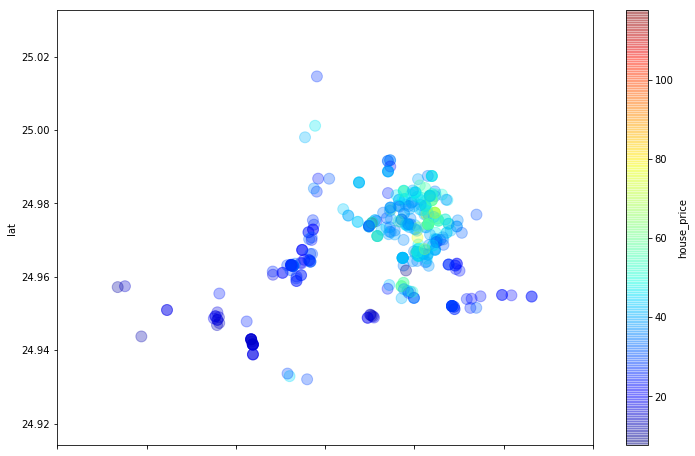

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt
estate.plot(kind="scatter", x="lng", y="lat", alpha = 0.3, figsize=(12,8), s=120, c="house_price", cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

In [7]:
features = estate.drop(columns=['No', 'trans_date', 'lat', 'lng', "house_age", "house_price"])
features.head()

,dist_mrt,conv_stores
0,84.87882,10
1,306.59470,9
2,561.98450,5
3,561.98450,5
4,390.56840,5


In [8]:
X = features.values
y = estate["house_price"].values

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
y_pred

array([45.46725328, 42.61602135, 39.30086753, 39.89572015, 30.64008942,
       46.42710496, 43.77787224, 43.77787224, 33.16479037, 49.48127545,
       34.08376472, 30.85625891, 31.31920099, 33.08289081, 39.68570363,
       32.17833615, 46.73227258, 47.39352034, 31.34433777, 45.52221441,
        4.24450771, 32.94166007, 43.19814726, 44.74871361, 15.69452535,
       39.79635387, 16.39661239, 39.30086753, 44.47487971, 41.9922044 ,
       13.84878763, 34.22058846, 44.32856479, 32.76847078, 44.72246429,
       36.92098381, 49.48127545, 16.35493254, 48.67183724, 47.24787106,
       38.69448298, 41.21394154, 50.65437912, 37.70067936, 42.61602135,
       46.1183405 , 46.27194242, 24.75245769, 47.5830031 , 50.64050264,
       45.46725328, 43.23654609, 44.20030693, 45.46073506, 40.44853106,
       16.35493254, 42.46009896, 33.78926925, 30.64008942, 43.77787224,
       30.69791098, 33.49146046, 16.35493254, 14.25201543,  3.71921218,
       32.94166007, 33.08167376, 47.34256348, 38.84777596, 33.08

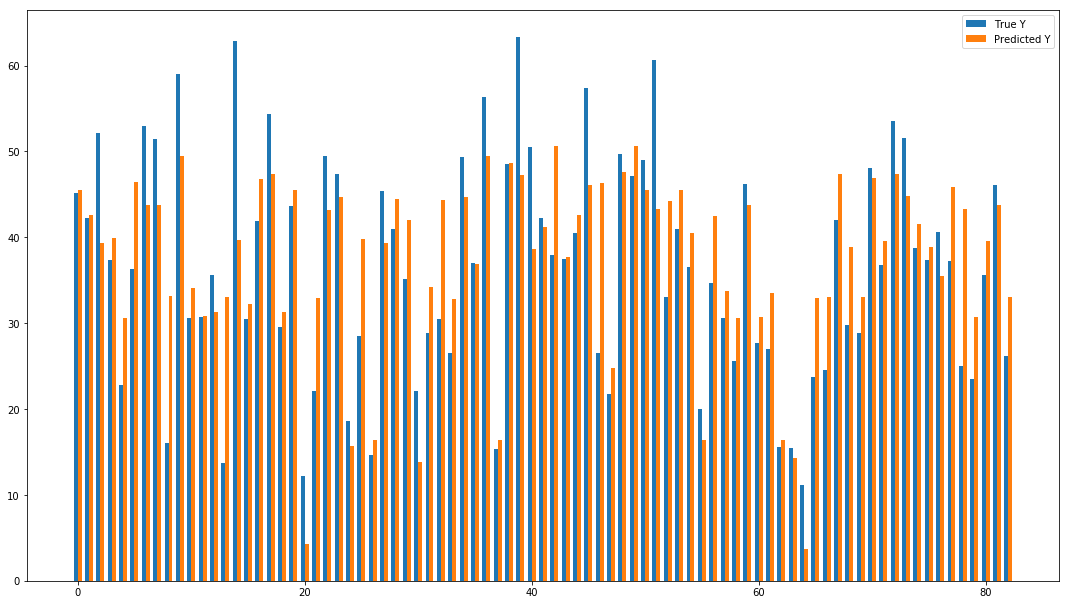

In [14]:
import numpy as np
ind = np.arange(len(y_test))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, y_test, width, label='True Y')
rects2 = ax.bar(ind + width/2, y_pred, width, label='Predicted Y')
fig.set_size_inches(18.5, 10.5)
ax.legend()
plt.show()

In [15]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  


Mean Absolute Error: 6.344872871402424


In [16]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 4.835817555938037
